# Creating a model for voice recognition
In this notebook, we will create a model to recognize who is talking (man or woman).

## Loading the packages

In [72]:
import numpy as np
import matplotlib.pyplot as pl
import os
import glob
import scipy.io.wavfile as wav
from python_speech_features import mfcc

## The Dataset

The dataset consists of .wav files respresenting different people pronoucing vowels (man or woman). The final dataset will contains 13 characteristics based on different sound features (mfcc) and the class ∈ {1, -1}.

In [74]:
PATH = 'vowels/'

dataset_input = []
dataset_output = []

# Read all wav files in the vowels directory (for now only men and women)
for filepath in glob.glob(PATH + 'na[f|m]*'):
    sample_rate, X = wav.read(filepath)
    ceps = mfcc(X, samplerate=sample_rate, nfft=1024)

    # Add it to the dataset (input and output)
    dataset_input.append(ceps.mean(axis=0))
    dataset_output.append(-1 if 'naf' in filepath else 1)    

Format the data input and output into the dataset

In [83]:
dataset = np.hstack((np.vstack(dataset_input), np.vstack(dataset_output)))
print(dataset.shape)

(72, 14)


## Learning with MLP
We will use MLP to determine the proper classification between man and woman

In [85]:
import mlp_backprop_momentum as mlp

In [93]:
input_data = dataset[:,0:13]
output_data = dataset[:,13]
nn = mlp.MLP([13,5,1], 'tanh')
# 13 inputs
# 2 hidden nodes
# 1 output

In [94]:
N_INITS = 10
EPOCHS = 200
N_NEURONS = [2, 4, 8, 16, 32]
LEARNING_RATE = 0.001
MOMENTUM = 0.5

In [96]:
MSE = np.zeros((len(N_NEURONS), N_INITS, EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping over the number of hidden neurons
    print('Testing', h, 'neurons...')
    nn = mlp.MLP([2,h,1], 'tanh')
    for i in np.arange(N_INITS):                                        # looping over the initializations
        nn.init_weights()
        
        MSE[i_h, i, :] = nn.fit((dataset[:,0:2], dataset[:,2:3]),
                                learning_rate=LEARNING_RATE,
                                momentum=MOMENTUM,
                                epochs=EPOCHS)

Testing 2 neurons...
Testing 4 neurons...
Testing 8 neurons...
Testing 16 neurons...
Testing 32 neurons...


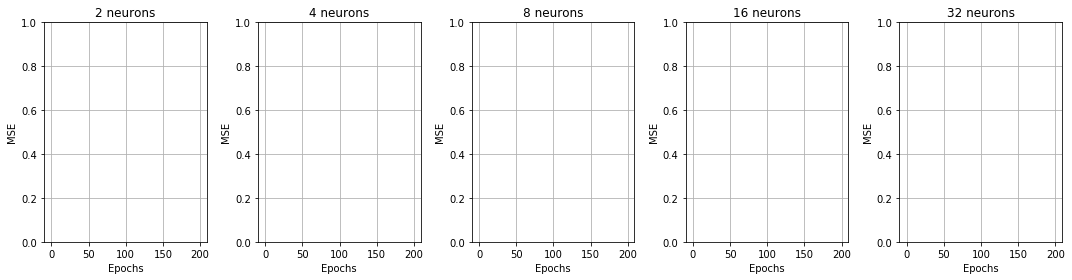

In [97]:
pl.figure(figsize=(15,4))
p_count = 0
for n in np.arange(MSE.shape[0]):
    pl.subplot(1, MSE.shape[0], n+1)
    for i in np.arange(MSE.shape[1]):
        pl.plot(MSE[n,i,:], c='b')
    pl.ylim(0,1)
    pl.xlabel('Epochs')
    pl.ylabel('MSE')
    pl.title(str(N_NEURONS[n]) + ' neurons')
    pl.grid()
pl.tight_layout()